In [1]:
cd C:\Users\tul18813\Desktop\BigGeo\AppDev\data

C:\Users\tul18813\Desktop\BigGeo\AppDev\data


In [2]:
import rasterio
import fiona

In [3]:
nlcd_file = 'imp.tif'
nlcd_dataset = rasterio.open(nlcd_file)

In [4]:
import geopandas as gpd

county_shapefile = 'county.shp'
county_gdf = gpd.read_file(county_shapefile)

In [5]:
county_name = input("Enter the name of the county: ")

# Filter the states GeoDataFrame based on the user input
selected_county = county_gdf[county_gdf['NAME'] == county_name]

Enter the name of the county:  Philadelphia


In [6]:
from rasterio.mask import mask

# Extract the geometry of the selected state
geometry = selected_county.geometry.values[0]

# Clip the NLCD dataset based on the geometry of the selected state
clipped_nlcd, _ = mask(nlcd_dataset, [geometry], crop=True)

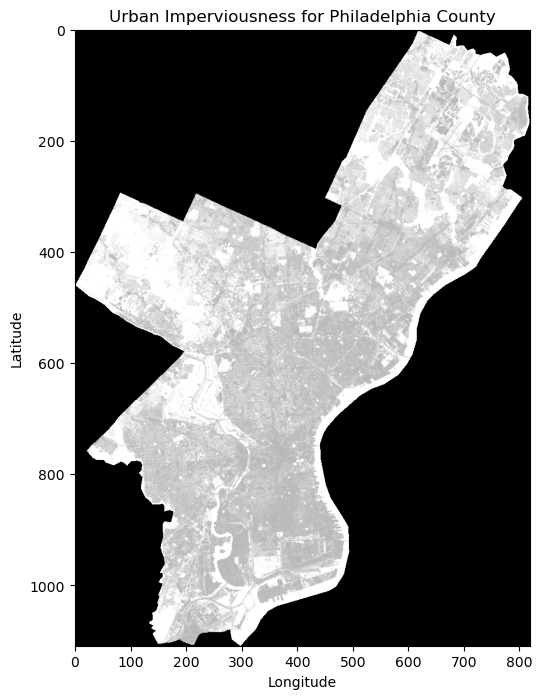

In [7]:
import matplotlib.pyplot as plt
from rasterio.plot import show

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Visualize the clipped NLCD data
show(clipped_nlcd, ax=ax, cmap='Grays')

# Add title
ax.set_title('Urban Imperviousness for {} County'.format(county_name))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()